In [42]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np

In [43]:
#Import cleaned up Default Data 
Default = "../Clean Default.csv"
Default_info = pd.read_csv(Default)
Default_info.head()

,Unnamed: 0,BAD,Loan Total,Mortgage Due,Home Value,Reason of Default,Occupation,Years at Job,Major derogatory,Delinquent credit lines,Age Of Oldest Credit Line in Months,Number Of Recent Credit Inquiries,Number of Credit Lines,Debt-to-Income Ratio
0,3538,0,18600,57300.0,8000.0,DebtCon,Other,6.0,NaN,NaN,68.000000,1.0,17.0,NaN
1,40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
2,156,1,5000,NaN,9100.0,HomeImp,Other,1.0,0.0,0.0,54.733333,2.0,8.0,NaN
3,213,1,5200,NaN,9500.0,DebtCon,Other,1.0,0.0,1.0,81.100000,1.0,2.0,NaN
4,940,1,9100,NaN,11550.0,HomeImp,Other,NaN,0.0,0.0,51.933333,1.0,3.0,NaN


In [44]:
#Import the cleaned up Long Beach csv
File2 = "../Clean Long Beach.csv"
LB_info = pd.read_csv(File2)

#Drop unnecessary columns 
LB_info = LB_info.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Zipcode","Type"],axis = 1)

#Convert the column that are 'object' type to 'float' type
LB_info = LB_info.convert_objects(convert_numeric=True)
LB_info['Long Beach Zip Code'] = LB_info['Long Beach Zip Code'].astype(np.float64)

#Sort the Long Beach dataframe by ascending Home Value
LB_info = LB_info.sort_values("Home Value",ascending = True)
LB_info

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,Long Beach Zip Code,Home Value
0,90802.0,378200.0
9,90813.0,396200.0
3,90805.0,466700.0
8,90810.0,477400.0
2,90804.0,491300.0
4,90806.0,535500.0
5,90807.0,639100.0
6,90808.0,685500.0
11,90815.0,697200.0
10,90814.0,750600.0


In [50]:
#Convert the column Home Value from the LB Dataframe to list
Home_Value = [10000,50000,100000,500000]

#Create empty list to store values
Total_list= [];
Default_list = [];
Not_Default_list = [];

#Run a for loop to see all Default table that are less than the current House value i  
for i in Home_Value:
    Tabless = Default_info[Default_info["Home Value"] < i]
    #The following are conditions and can be changed for each city
    Tabless = Tabless[Tabless["Years at Job"] <= 10]
    Tabless = Tabless[Tabless["Mortgage Due"] <= 10000]
    Tabless = Tabless[Tabless["Loan Total"] <= 10000]
    Total = Tabless['BAD'].count()
    Default = (Tabless['BAD'] == 1).sum()
    Not_Default = (Tabless['BAD'] == 0).sum()
    Total_list.append(Total)
    Default_list.append(Default)
    Not_Default_list.append(Not_Default)
     

#Making a DataFrame from the list we were able to obtain 
Numbers = pd.Series(Home_Value)
df = pd.DataFrame({"Total Count of Default & Not Default": Total_list, "Sum of Default": Default_list,"Sum of Not Default":Not_Default_list})
df = df.set_index(Numbers)
df = df.drop_duplicates('Sum of Default')

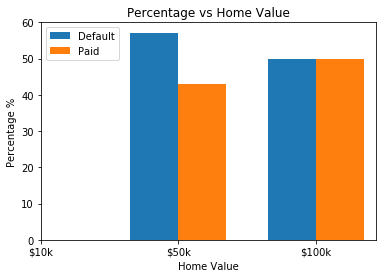

In [49]:
#Calculate the percentage of individuals that defaulted and those that did not
percent_default =(df["Sum of Default"]/df["Total Count of Default & Not Default"]*100).tolist()
percent_not_default = (df["Sum of Not Default"]/df["Total Count of Default & Not Default"]*100).tolist()

#Plotting 
ind = np.arange(len(percent_default))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, percent_default, width,label= "Default")
rects2 = ax.bar(ind + width/2, percent_not_default, width, label= "Paid")
ax.set_xlabel('Home Value')
ax.set_ylabel('Percentage %')
ax.set_title('Percentage vs Home Value')
ax.set_xticks(ind)
ax.set_xticklabels(('$10k','$50k','$100k','$75k','$100k','$125k','$150k'))
ax.legend()

